# Spotify EDA <br>
https://www.kaggle.com/yamaerenay/spotify-datase <br><br>
1. 음악의 특징들간 상관관계 <br>
2. 장르별 음악의 특징 분포 <br>
3. 시간대에 따른 음악 변천사 분석 (큼직한 아티스트들 insight) <br> 
4. 스포티파이 내 popularity

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [154]:
# 라이브러리
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib as mpl
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [155]:
from tensorflow.python.client import device_lib 
import tensorflow as tf
device_lib.list_local_devices() 

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 146045716583865194,
 name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 9632251373251337589
 physical_device_desc: "device: XLA_CPU device",
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 4951408640
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 11777688303440414474
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:1c:00.0, compute capability: 7.5",
 name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 5559405558154346706
 physical_device_desc: "device: XLA_GPU device"]

In [156]:
# tracks 데이터 불러오기
df = pd.read_csv('../../../../datascience/spotify/data/tracks.csv')
df

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [158]:
# 필요없는 컬럼 제거
df.drop(['explicit','id','id_artists','time_signature'],axis=1,inplace=True)
df.head()

,name,popularity,duration_ms,artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Carve,6,126903,['Uli'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851
1,Capítulo 2.16 - Banquero Anarquista,0,98200,['Fernando Pessoa'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009
2,Vivo para Quererte - Remasterizado,0,181640,['Ignacio Corsini'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418
3,El Prisionero - Remasterizado,0,176907,['Ignacio Corsini'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980
4,Lady of the Evening,0,163080,['Dick Haymes'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220


In [159]:
# ms를 second(int)로 변환 (열 추가)
df['duration_sec'] = (df["duration_ms"]/1000).round()
df['duration_sec'] = df["duration_sec"].astype('int64')
df.drop(['duration_ms'],axis=1,inplace=True)
df['duration_sec']

0         127
1          98
2         182
3         177
4         163
         ... 
586667    258
586668    153
586669    188
586670    142
586671    214
Name: duration_sec, Length: 586672, dtype: int64

In [ ]:
# 년도만 출력
df['release_date'] = df['release_date'].astype('str')
df['release_date'] = df['release_date'].str[:4]

In [ ]:
# 발매일 datetime 변환
df['release_date'] = pd.to_datetime(df['release_date'], format="%Y")
df.info()

In [ ]:
# 발매일에 따른 음원 분포
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
ax = sns.displot(df['release_date'],bins=20)
ax.set(title ="tracks.csv")
plt.savefig('year_count.png', dpi = 300)

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["duration_sec"])

In [ ]:
# 발매일에 따른 음원 분포
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
ax = sns.displot(df['duration_sec'], kde=True)
ax.set(title ="duration_sec.csv")
plt.savefig('year_count.png', dpi = 300)

In [ ]:
df['duration_sec'].mean()

In [ ]:
# key, mode 분리
df_category = df[['key','mode']]
df_category

In [ ]:
# key, mode 삭제 
df.drop(['key','mode'],axis=1,inplace=True)

In [ ]:
# feature correlation (heatmap)
plt.figure(figsize=(20, 10))
corr = df.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.savefig('feature_heatmap.png', dpi = 400)

In [ ]:
# key sum값
key = df_category['key'].value_counts()
key

In [ ]:
# mode sum값
mode = df_category['mode'].value_counts()
mode

In [ ]:
# key, mode 파이차트
key_mapping = {0:"C",1:"C♯",2:"D",3:"D♯",4:"E",5:"F",6:"F♯",7:"G",8:"G♯",9:"A",10:"A♯",11:"B"}
key_counts_df = pd.DataFrame(df_category["key"].value_counts())
key_counts_df['key_names'] = key_counts_df.index.to_series().map(key_mapping)

key_labels = key_counts_df['key_names'].values
key_values = key_counts_df['key'].values

mode_mapping = {0:"Minor",1:"Major"}
mode_counts_df = pd.DataFrame(df_category["mode"].value_counts())
mode_counts_df['mode_names'] = mode_counts_df.index.to_series().map(mode_mapping)

mode_labels = mode_counts_df['mode_names'].values
mode_values = mode_counts_df['mode'].values

fig = make_subplots(rows=1, cols=2,specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(
    go.Pie(labels=key_labels, values=key_values),row=1, col=1)

fig.add_trace(
    go.Pie(labels=mode_labels, values=mode_values),row=1, col=2)

fig.update_traces(textinfo='percent+label')


fig.update_layout(height=600, width=1200, title="Keys / Modes")
fig.show()

In [ ]:
plt.figure(figsize=(16, 8))
sns.displot(df.popularity,bins=20)
ax.set_title('popularity_density')
plt.savefig('popularity_count.png', dpi = 400)

In [ ]:
df_year = pd.read_csv('./drive/MyDrive/spotify/data/data_by_year_o.csv')

plt.figure(figsize=(17, 8))
sns.set(style="whitegrid")
columns = ["acousticness","danceability","energy","valence", "instrumentalness"]
for col in columns:
    x = df_year.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Music trends')
ax.set_ylabel('Value')
ax.set_xlabel('Year')

plt.savefig('music_trends.png', dpi = 400)

In [ ]:
df_year = pd.read_csv('./drive/MyDrive/spotify/data/data_by_year_o.csv')

plt.figure(figsize=(17, 8))
sns.set(style="whitegrid")
columns = ["loudness"]
for col in columns:
    x = df_year.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Music trends(loudness)')
ax.set_ylabel('Value')
ax.set_xlabel('Year')

plt.savefig('music_trends(loudness).png', dpi = 400)

In [ ]:
df_year = pd.read_csv('./drive/MyDrive/spotify/data/data_by_year_o.csv')

# ms를 second(int)로 변환 (열 추가)
df_year['duration_sec'] = (df_year["duration_ms"]/1000).round()
df_year['duration_sec'] = df_year["duration_sec"].astype('int64')

plt.figure(figsize=(17, 8))
sns.set(style="whitegrid")
columns = ["duration_sec"]
for col in columns:
    x = df_year.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Music trends(duration)')
ax.set_ylabel('Value')
ax.set_xlabel('Year')

plt.savefig('music_trends(duration).png', dpi = 400)

In [ ]:
df_year = pd.read_csv('./drive/MyDrive/spotify/data/data_by_year_o.csv')

plt.figure(figsize=(17, 8))
sns.set(style="whitegrid")
columns = ["tempo"]
for col in columns:
    x = df_year.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Music trends(tempo)')
ax.set_ylabel('Value')
ax.set_xlabel('Year')

plt.savefig('music_trends(tempo).png', dpi = 400)

In [ ]:
df_genre = pd.read_csv('./drive/MyDrive/spotify/data/data_by_genres_o.csv')
df_genre.drop(['key','mode', 'duration_ms', 'liveness', 'speechiness'],axis=1,inplace=True)
df_genre

In [ ]:
pop = df_genre[df_genre['genres'].str.contains('pop')]
pop.mean()

In [ ]:
rock = df_genre[df_genre['genres'].str.contains('rock')]
rock.mean()

In [ ]:
metal = df_genre[df_genre['genres'].str.contains('metal')]
metal.mean()

In [ ]:
jazz = df_genre[df_genre['genres'].str.contains('jazz')]
jazz.mean()

In [ ]:
hiphop = df_genre[df_genre['genres'].str.contains('hip')]
hiphop.mean()

In [ ]:
classical = df_genre[df_genre['genres'].str.contains('classical')]
classical.mean()

In [ ]:
k_pop = df_genre[df_genre['genres'].str.contains('k-pop')]
k_pop.mean()

In [ ]:
genres_clear = pd.DataFrame({'pop' : rock.mean(), 'jazz' : jazz.mean(), 'classical' : classical.mean(), 'rock' : rock.mean(), 'hiphop' : hiphop.mean(), 'k-pop' : k_pop.mean()})
genres_clear = genres_clear.T
genres_clear

In [ ]:
plt.figure(figsize=(17, 8))
sns.set(style="whitegrid")
columns = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'valence']
for col in columns:
    x = genres_clear[col]
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('genre_features')
ax.set_ylabel('value')
ax.set_xlabel('Genre')

plt.savefig('genres1.png', dpi = 400)

In [ ]:
plt.figure(figsize=(17, 8))
sns.set(style="whitegrid")
columns = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'valence']
for col in columns:
    x = genres_clear[col]
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('genre_features')
ax.set_ylabel('value')
ax.set_xlabel('Genre')

In [ ]:
plt.figure(figsize=(17, 8))
sns.set(style="whitegrid")
columns = ['loudness']
for col in columns:
    x = genres_clear[col]
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('genre_loudness')
ax.set_ylabel('value')
ax.set_xlabel('Genre')

plt.savefig('genres2.png', dpi = 400)

In [ ]:
plt.figure(figsize=(17, 8))
sns.set(style="whitegrid")
columns = ['tempo']
for col in columns:
    x = genres_clear[col]
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('genre_tempo')
ax.set_ylabel('value')
ax.set_xlabel('Genre')

plt.savefig('genres3.png', dpi = 400)

In [ ]:
plt.figure(figsize=(17, 8))
sns.set(style="whitegrid")
columns = ['popularity']
for col in columns:
    x = genres_clear[col]
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('genre_popularity')
ax.set_ylabel('value')
ax.set_xlabel('Genre')

plt.savefig('genres4.png', dpi = 400)

In [ ]:
df_artist = pd.read_csv('./drive/MyDrive/spotify/data/data_by_artist_o.csv')
df_artist["artists"] = df_artist["artists"].str.replace(pat=r'[^\w]', repl=r'', regex=True)
df_artist
# 너무 오래걸림ㅠ

In [ ]:
df_artist.info()

In [ ]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
x = df.groupby("artists")["popularity"].mean().sort_values(ascending=False).head(10)
ax = sns.barplot(x.index, x)
ax.set_title('Top Artists with Popularity')
ax.set_ylabel('Popularity')
ax.set_xlabel('Artists')
plt.xticks(rotation = 90)

plt.savefig('top10.png', dpi = 400)

In [ ]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
x = df.groupby("artists")["popularity"].mean().sort_values(ascending=False).head(10)
ax = sns.barplot(x.index, x)
ax.set_title('Top Artists with Popularity')
ax.set_ylabel('Popularity')
ax.set_xlabel('Artists')
plt.xticks(rotation = 90)

plt.savefig('top10.png', dpi = 400)

In [ ]:
df_artist = pd.read_csv('./drive/MyDrive/spotify/data/data_by_artist_o.csv')
df_artist

In [ ]:
BTS = df_artist[df_artist['artists'] == 'BTS']
BTS.head()

In [ ]:
Beatles = df_artist[df_artist['artists'] == 'The Beatles']
Beatles.head()

In [ ]:
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
x = df.groupby("artists")["popularity"].sum().sort_values(ascending=False).head(20)
ax = sns.barplot(x.index, x)
ax.set_title('Top Artists with Popularity (Sum)')
ax.set_ylabel('Popularity')
ax.set_xlabel('Artists')
plt.xticks(rotation = 90)

plt.savefig('top10.png', dpi = 500)

# feature engineering
- for popularity

In [160]:
df.head()

,name,popularity,artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_sec
0,Carve,6,['Uli'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,127
1,Capítulo 2.16 - Banquero Anarquista,0,['Fernando Pessoa'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,98
2,Vivo para Quererte - Remasterizado,0,['Ignacio Corsini'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,182
3,El Prisionero - Remasterizado,0,['Ignacio Corsini'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,177
4,Lady of the Evening,0,['Dick Haymes'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,163


In [161]:
# 년도만 출력
df['release_date'] = df['release_date'].astype('str')
df['release_date'] = df['release_date'].str[:4]
df['release_date'] = df['release_date'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              586601 non-null  object 
 1   popularity        586672 non-null  int64  
 2   artists           586672 non-null  object 
 3   release_date      586672 non-null  int32  
 4   danceability      586672 non-null  float64
 5   energy            586672 non-null  float64
 6   key               586672 non-null  int64  
 7   loudness          586672 non-null  float64
 8   mode              586672 non-null  int64  
 9   speechiness       586672 non-null  float64
 10  acousticness      586672 non-null  float64
 11  instrumentalness  586672 non-null  float64
 12  liveness          586672 non-null  float64
 13  valence           586672 non-null  float64
 14  tempo             586672 non-null  float64
 15  duration_sec      586672 non-null  int64  
dtypes: float64(9), int32

In [162]:
df.head()

,name,popularity,artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_sec
0,Carve,6,['Uli'],1922,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,127
1,Capítulo 2.16 - Banquero Anarquista,0,['Fernando Pessoa'],1922,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,98
2,Vivo para Quererte - Remasterizado,0,['Ignacio Corsini'],1922,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,182
3,El Prisionero - Remasterizado,0,['Ignacio Corsini'],1922,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,177
4,Lady of the Evening,0,['Dick Haymes'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,163


In [163]:
df.rename(columns={'release_date': 'year'}, inplace=True)
df.head()

,name,popularity,artists,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_sec
0,Carve,6,['Uli'],1922,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,127
1,Capítulo 2.16 - Banquero Anarquista,0,['Fernando Pessoa'],1922,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,98
2,Vivo para Quererte - Remasterizado,0,['Ignacio Corsini'],1922,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,182
3,El Prisionero - Remasterizado,0,['Ignacio Corsini'],1922,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,177
4,Lady of the Evening,0,['Dick Haymes'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,163


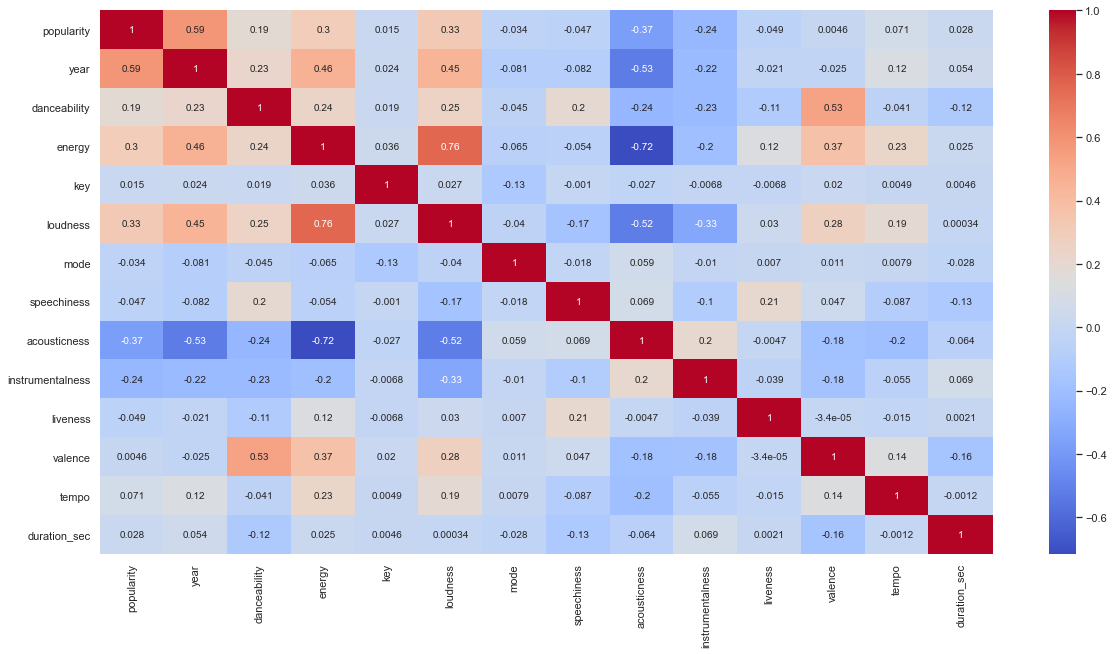

In [164]:
# feature correlation (heatmap)
plt.figure(figsize=(20, 10))
corr = df.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.savefig('feature_heatmap.png', dpi = 400)

MinMax Scaling

In [165]:
# 곡 이름, 가수 제거
df_features = df.sort_values(by='year').drop(columns=['name', 'artists']).copy()

In [166]:
X = df_features.drop('popularity', axis=1).copy()
y = df_features['popularity'].copy()

In [167]:
X

,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_sec
478627,1900,0.659,0.791,2,-4.895,1,0.0295,0.1390,0.000002,0.1610,0.956,141.999,234
132350,1922,0.567,0.663,2,-5.334,1,0.0318,0.9920,0.878000,0.2680,0.853,103.394,233
132349,1922,0.483,0.060,1,-9.499,1,0.0420,0.9820,0.000089,0.0498,0.381,136.044,196
132348,1922,0.578,0.462,8,-7.217,1,0.0398,0.9950,0.903000,0.0767,0.513,89.876,195
132347,1922,0.565,0.334,10,-6.802,1,0.0309,0.9780,0.032900,0.2560,0.550,97.167,190
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211946,2021,0.777,0.714,11,-4.296,1,0.0532,0.1600,0.000000,0.1150,0.590,90.987,237
211945,2021,0.804,0.786,10,-3.837,0,0.0735,0.1440,0.000000,0.0928,0.575,91.992,309
211944,2021,0.807,0.606,3,-8.871,0,0.0872,0.0946,0.000000,0.1190,0.304,92.988,228
211955,2021,0.855,0.710,1,-5.321,1,0.0939,0.0426,0.000000,0.3370,0.591,89.977,247


In [168]:
y

478627    19
132350     0
132349     0
132348     0
132347     0
          ..
211946     1
211945     0
211944     0
211955     1
444564    71
Name: popularity, Length: 586672, dtype: int64

In [169]:
# 정규화
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.        , 0.66498486, 0.791     , ..., 0.956     , 0.57633908,
        0.04111784],
       [0.18181818, 0.57214934, 0.663     , ..., 0.853     , 0.41965087,
        0.04093984],
       [0.18181818, 0.48738648, 0.06      , ..., 0.381     , 0.5521692 ,
        0.03435386],
       ...,
       [1.        , 0.81432896, 0.606     , ..., 0.304     , 0.37741547,
        0.04004984],
       [1.        , 0.86276488, 0.71      , ..., 0.591     , 0.36519456,
        0.04343183],
       [1.        , 0.90413724, 0.459     , ..., 0.484     , 0.51115549,
        0.02954788]])

train / test set 구분

In [170]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.3, random_state=7)

1. Linear Regression 

In [ ]:
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성 후 학습시키기
lr = LinearRegression().fit(X_train, y_train)

y_predict = lr.predict(X_test)
y_predict

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test, y_predict))
print(mean_absolute_error(y_test, y_predict))

In [ ]:
r_square = lr.score(X_test, y_test)
r_square

In [ ]:
print("훈련 세트 정확도 : {:.2f}%".format(lr.score(X_train,y_train)*100))
print("테스트 세트 정확도 : {:.2f}%".format(lr.score(X_test,y_test)*100))

In [ ]:
mse_linear = mean_squared_error(y_test, y_predict)

2. Lasso Regression

In [ ]:
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import Lasso

# 다항 회귀분석 모형 객체 생성 후 학습 시키기
lasso001 = Lasso(alpha=0.01).fit(X_train,y_train)

y_predict = lasso001.predict(X_test)
y_predict

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test, y_predict))
print(mean_absolute_error(y_test, y_predict))

In [ ]:
mse_lasso = mean_squared_error(y_test, y_predict)

In [ ]:
# 학습을 마친 모형에 test data를 적용하여 결정계수 (R-제곱) 계산
# -> 결정계수 값이 클수록 모형의 예측 능력이 좋다고 판단
r_square = lasso001.score(X_test,y_test)
r_square

In [ ]:
print("훈련 세트 정확도 : {:.2f}%".format(lasso001.score(X_train,y_train)*100))
print("테스트 세트 정확도 : {:.2f}%".format(lasso001.score(X_test,y_test)*100))

3. Ridge Regression

In [ ]:
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import Ridge

# 다항 회귀분석 모형 객체 생성 후 학습 시키기
ridge50 = Ridge(alpha=5.0).fit(X_train,y_train)
y_predict = ridge50.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test, y_predict))
print(mean_absolute_error(y_test, y_predict))

In [ ]:
mse_ridge = mean_squared_error(y_test, y_predict)

In [ ]:
# 학습을 마친 모형에 test data를 적용하여 결정계수 (R-제곱) 계산
# -> 결정계수 값이 클수록 모형의 예측 능력이 좋다고 판단
r_square = ridge50.score(X_test,y_test)
r_square

4. Decision Tree

In [ ]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
# train 데이터를 가지고 모델 학습
tree_model.fit(X_train, y_train)

# test 데이터를 가지고 모델 예측
y_predict = tree_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test, y_predict))
print(mean_absolute_error(y_test, y_predict))

In [ ]:
mse_tree = mean_squared_error(y_test, y_predict)

In [ ]:
print(f"train set 정확도 : {tree_model.score(X_train, y_train)*100:.2f}")
print(f"test set 정확도 : {tree_model.score(X_test, y_test)*100:.2f}")

In [ ]:
training_accuracy = []
test_accuracy = []
# 1 에서 10 까지 max_depth 를 적용
max_depth_settings = range(1, 11)

for max_depth in max_depth_settings:
    # 모델 생성
    tr = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    tr.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(tr.score(X_train, y_train))
    # 테스트 세트(일반화) 정확도 저장
    test_accuracy.append(tr.score(X_test, y_test))

In [ ]:
plt.figure(dpi = 200)

plt.plot(max_depth_settings, training_accuracy, label="train acc")
plt.plot(max_depth_settings, test_accuracy, label="test acc")
plt.ylabel("acc")
plt.xlabel("max_depth")
plt.legend()
plt.show()

5. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

random = RandomForestRegressor(n_estimators=5,
                                   random_state=0).fit(X_train,y_train)

In [ ]:
random.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test, y_predict))
print(mean_absolute_error(y_test, y_predict))

In [ ]:
mse_random = mean_squared_error(y_test, y_predict)

In [ ]:
# 정확도 확인
print('Train data Score : ', random.score(X_train, y_train))
print('Test data Score : ', random.score(X_test, y_test))

r_square = random.score(X_test,y_test)
r_square

6. Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(random_state=777)
reg.fit(X_train, y_train)
y_predict = reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test, y_predict))
print(mean_absolute_error(y_test, y_predict))

In [ ]:
mse_boost = mean_squared_error(y_test, y_predict)

# 7. Linear (nn)

In [171]:
# train / validation 데이터를 7:3 비율로 분리
x_train, x_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=0.3,
                                                  random_state=777)

In [ ]:
print(x_train.shape, x_val.shape)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(13,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # 하나의 값을 출력 -> popularity

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae','mse'])

In [ ]:
# 모델 학습하기
history = model.fit(x_train,y_train,
                    batch_size=128,
                    epochs = 500,
                    validation_data = (X_val, y_val))

모델 평가

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
mse = his_dict['mse']
val_mse = his_dict['val_mse'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(mse) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, mse, color = 'blue', label = 'train_mse')
ax1.plot(epochs, val_mse, color = 'orange', label = 'val_mse')
ax1.set_title('train and val mse')
ax1.set_xlabel('epochs')
ax1.set_ylabel('mse')
ax1.legend()

mae = his_dict['mae']
val_mae = his_dict['val_mae']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, color = 'blue', label = 'train_mae')
ax2.plot(epochs, val_mae, color = 'orange', label = 'val_mae')
ax2.set_title('train and val mae')
ax2.set_xlabel('epochs')
ax2.set_ylabel('mae')
ax2.legend()

plt.show()
plt.savefig('nn_model.png', dpi = 400)

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [popularity]')
plt.ylabel('Predictions [popularity]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [ ]:
mse_nn = mean_squared_error(y_test, test_predictions)
mse_nn

In [ ]:
mse_list = [mse_linear, mse_lasso, mse_ridge, mse_tree, mse_random, mse_boost, mse_nn]
mse_list

In [ ]:
plt.figure(figsize=(17, 8))
sns.set(style="whitegrid")
ax = sns.lineplot(data=mse_list)
ax.set_xticklabels(['','linear', 'lasso', 'ridge', 'tree', 'random', 'boost', 'nn'])
ax.set_title('model comparision')
ax.set_ylabel('MSE')
ax.set_xlabel('MODEL')
plt.savefig('model_mse.png', dpi = 400)

## 레이어 변경

In [180]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(13,)))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1))  # 하나의 값을 출력 -> popularity

In [181]:
model.compile(optimizer='adam', loss='mse', metrics=['mae','mse'])

In [182]:
# 모델 학습하기
history222 = model.fit(x_train,y_train,
                    batch_size=128,
                    epochs = 300,
                    validation_data = (x_val, y_val))

Epoch 1/300
2246/2246 [==============================] - 7s 3ms/step - loss: 288.8248 - mae: 12.9434 - mse: 288.8248 - val_loss: 191.5631 - val_mae: 10.6825 - val_mse: 191.5631
Epoch 2/300
2246/2246 [==============================] - 7s 3ms/step - loss: 192.1753 - mae: 10.6063 - mse: 192.1753 - val_loss: 187.8607 - val_mae: 10.3394 - val_mse: 187.8607
Epoch 3/300
2246/2246 [==============================] - 7s 3ms/step - loss: 190.0288 - mae: 10.5179 - mse: 190.0288 - val_loss: 190.2849 - val_mae: 10.5857 - val_mse: 190.2849
Epoch 4/300
2246/2246 [==============================] - 7s 3ms/step - loss: 188.8587 - mae: 10.4692 - mse: 188.8587 - val_loss: 185.4654 - val_mae: 10.3935 - val_mse: 185.4654
Epoch 5/300
2246/2246 [==============================] - 7s 3ms/step - loss: 187.8410 - mae: 10.4286 - mse: 187.8410 - val_loss: 185.0887 - val_mae: 10.3281 - val_mse: 185.0887
Epoch 6/300
2246/2246 [==============================] - 7s 3ms/step - loss: 187.2000 - mae: 10.4022 - mse: 187.200

In [183]:
model.evaluate(X_test, y_test)

5501/5501 [==============================] - 7s 1ms/step - loss: 175.6070 - mae: 9.9569 - mse: 175.6070


[175.60704040527344, 9.95689582824707, 175.60704040527344]

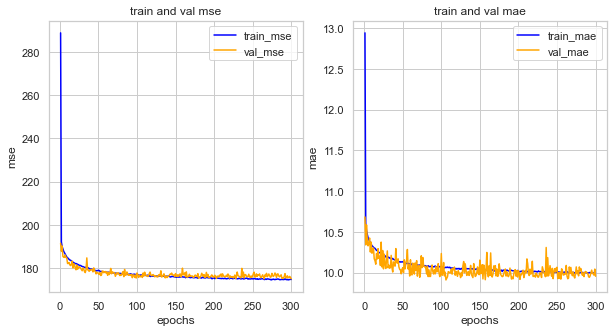

<Figure size 432x288 with 0 Axes>

In [185]:
import matplotlib.pyplot as plt

his_dict = history222.history
mse = his_dict['mse']
val_mse = his_dict['val_mse'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(mse) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, mse, color = 'blue', label = 'train_mse')
ax1.plot(epochs, val_mse, color = 'orange', label = 'val_mse')
ax1.set_title('train and val mse')
ax1.set_xlabel('epochs')
ax1.set_ylabel('mse')
ax1.legend()

mae = his_dict['mae']
val_mae = his_dict['val_mae']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, color = 'blue', label = 'train_mae')
ax2.plot(epochs, val_mae, color = 'orange', label = 'val_mae')
ax2.set_title('train and val mae')
ax2.set_xlabel('epochs')
ax2.set_ylabel('mae')
ax2.legend()

plt.show()
plt.savefig('nn_model.png', dpi = 400)

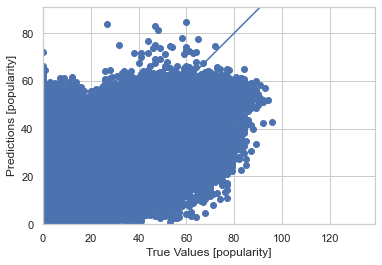

In [186]:
test_predictions = model.predict(X_test).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [popularity]')
plt.ylabel('Predictions [popularity]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [187]:
mse_nn = mean_squared_error(y_test, test_predictions)
mse_nn

175.6067537535339